In [42]:
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image
import os

In [110]:
class ImagesDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.img_names = os.listdir(root_dir)
        
    def __getitem__(self, index):
        img = Image.open(self.root_dir + '/' + self.img_names[index]).convert('L')
        item = transforms.ToTensor()(img)
        img.close()
        return item.reshape(64 * 64)

    def __len__(self):
        return len(self.img_names)

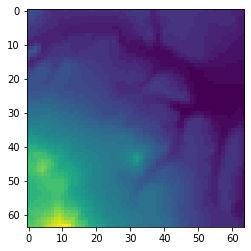

In [177]:
import matplotlib.pyplot as plt

dataset = ImagesDataset('./data')
plt.imshow(dataset[200].view(64, 64))
plt.show()

In [136]:
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [124]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(64 * 64, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), 
            nn.Linear(64, 16))
        
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), 
            nn.Linear(128, 64 * 64), 
            nn.Tanh())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [148]:
net = Autoencoder()

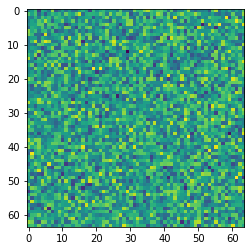

In [149]:
x = dataset[200]
output = net(x)
plt.imshow(output.view(64, 64).detach().numpy())
plt.show()

In [150]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 3

for epoch in range(epochs):
    for data in dataloader:
        net.zero_grad()
        output = net(data)
        loss = nn.MSELoss()(output, data)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)


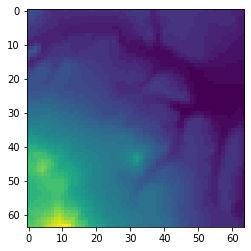

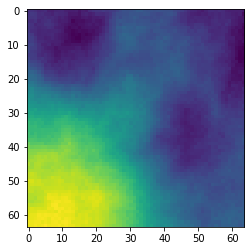

In [176]:
x = dataset[200]
plt.imshow(x.view(64, 64))
plt.show()
output = net(x)
plt.imshow(output.view(64, 64).detach().numpy())
plt.show()